In [1]:
import qiskit
import numpy as np

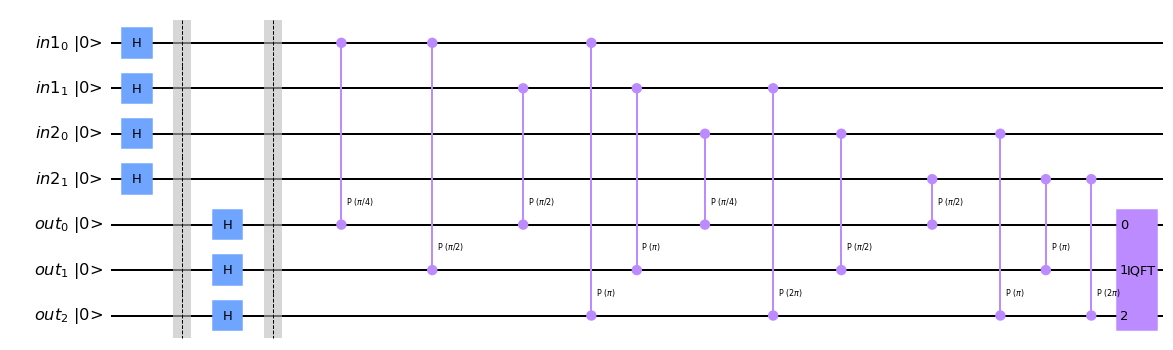

In [2]:
nr0 = 2
nr1 = 2
nr2 = 3
r0 = qiskit.QuantumRegister(nr0, 'in1')
r1 = qiskit.QuantumRegister(nr1, 'in2')
r2 = qiskit.QuantumRegister(nr2, 'out')
#anc = qiskit.QuantumRegister(1)

circuit = qiskit.QuantumCircuit(r0, r1, r2)#, anc)

circuit.h(r0)
circuit.h(r1)
#circuit.x(r0[0])
#circuit.x(r1[1])
circuit.barrier()
circuit.h(r2)
    
#circuit.x(anc[0])
    
circuit.barrier()

phiunit = 2. * np.pi / (2 ** r2.size)

for source in [r0, r1]:
    for isrc, src in enumerate(source):
        for itrg, trg in enumerate(r2):
            circuit.cp(phiunit * (2 ** isrc) * (2 ** itrg), src, trg)
            #circuit.mcrz(phiunit * (2 ** isrc) * (2 ** itrg), [src, trg], anc[0])
            #circuit.crz(phiunit * (2 ** isrc) * (2 ** itrg), trg, anc[0])
            #circuit.rz(0.5 * phiunit * (2 ** isrc) * (2 ** itrg), anc[0])
            #circuit.mcx([src, trg], anc[0])
            #circuit.rz(-0.5 * phiunit * (2 ** isrc) * (2 ** itrg), anc[0])
            #circuit.mcx([src, trg], anc[0])

iqft = qiskit.circuit.library.basis_change.qft.QFT(r2.size, inverse=True, do_swaps=True)
circuit.compose(iqft, r2, inplace=True)

#circuit.measure_all()

circuit.draw('mpl', style={'dpi': '300'}, fold=70, initial_state=True)

In [3]:
backend = qiskit.Aer.get_backend('qasm_simulator')
circuit = qiskit.transpile(circuit, backend=backend)
job = backend.run(circuit)

/usr/local/lib/python3.8/dist-packages/sympy/core/expr.py:3949: SymPyDeprecationWarning: 

expr_free_symbols method has been deprecated since SymPy 1.9. See
https://github.com/sympy/sympy/issues/21494 for more info.

  SymPyDeprecationWarning(feature="expr_free_symbols method",


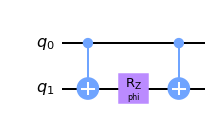

In [5]:
circuit = qiskit.QuantumCircuit(2)
circuit.cx(0, 1)
circuit.rz(qiskit.circuit.Parameter('phi'), 1)
circuit.cx(0, 1)
circuit.draw('mpl')

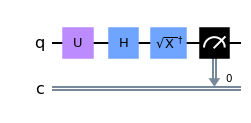

In [15]:
gate = qiskit.circuit.Gate('U', 1, [])
circuit = qiskit.QuantumCircuit(1, 1)
circuit.append(gate, [0])
circuit.h(0)
circuit.sxdg(0)

circuit.measure(0, 0)

circuit.draw('mpl')

In [12]:
for item in list(cnts.items())[10]:
    print(item)

260 = 82 + 178
1


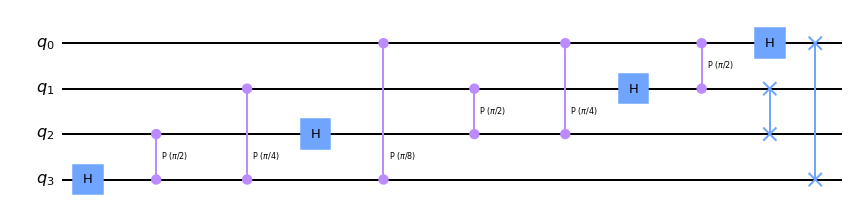

In [20]:
num_qubits = 4
circuit = qiskit.QuantumCircuit(num_qubits)

for itarg in range(num_qubits - 1, -1, -1):
    circuit.h(itarg)
    for ictrl in range(itarg - 1, -1, -1):
        power = ictrl - itarg - 1 + num_qubits
        circuit.cp((2 ** power) * 2. * np.pi / (2 ** num_qubits), ictrl, itarg)
        
for i in range(num_qubits // 2):
    circuit.swap(i, num_qubits - 1 - i)
    
circuit.draw('mpl')

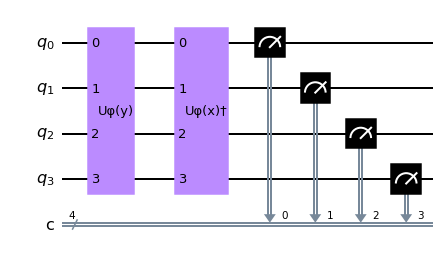

In [22]:
circuit = qiskit.QuantumCircuit(4, 4)
phi_y = qiskit.circuit.Gate('Uφ(y)', 4, [])
phi_xdg = qiskit.circuit.Gate('Uφ(x)†', 4, [])

circuit.append(phi_y, range(4))
circuit.append(phi_xdg, range(4))
circuit.measure(range(4), range(4))
circuit.draw('mpl')